# Project 16 Auto Insurance Fraud Prediction
-->Aim is to predict the insurance fraud from the given data.

## Lets import important libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets Load the dataset

In [3]:
data=pd.read_csv('Auto_insuranceFraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [5]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
data.drop(['_c39'],axis=1,inplace=True)

In [7]:
data.drop(['policy_number'],axis=1,inplace=True)

In [8]:
data.drop(['incident_location'],axis=1,inplace=True)

In [9]:
data['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [10]:
data['property_damage'].replace(['?'],['None'],inplace=True)

In [11]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [12]:
data['collision_type'].replace(['?'],['None'],inplace=True)

In [13]:
 data['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [14]:
data['police_report_available'].replace(['?'],['None'],inplace=True)

In [15]:
 data['police_report_available'].value_counts()

NO      343
None    343
YES     314
Name: police_report_available, dtype: int64

## Lets Check the Correlation.

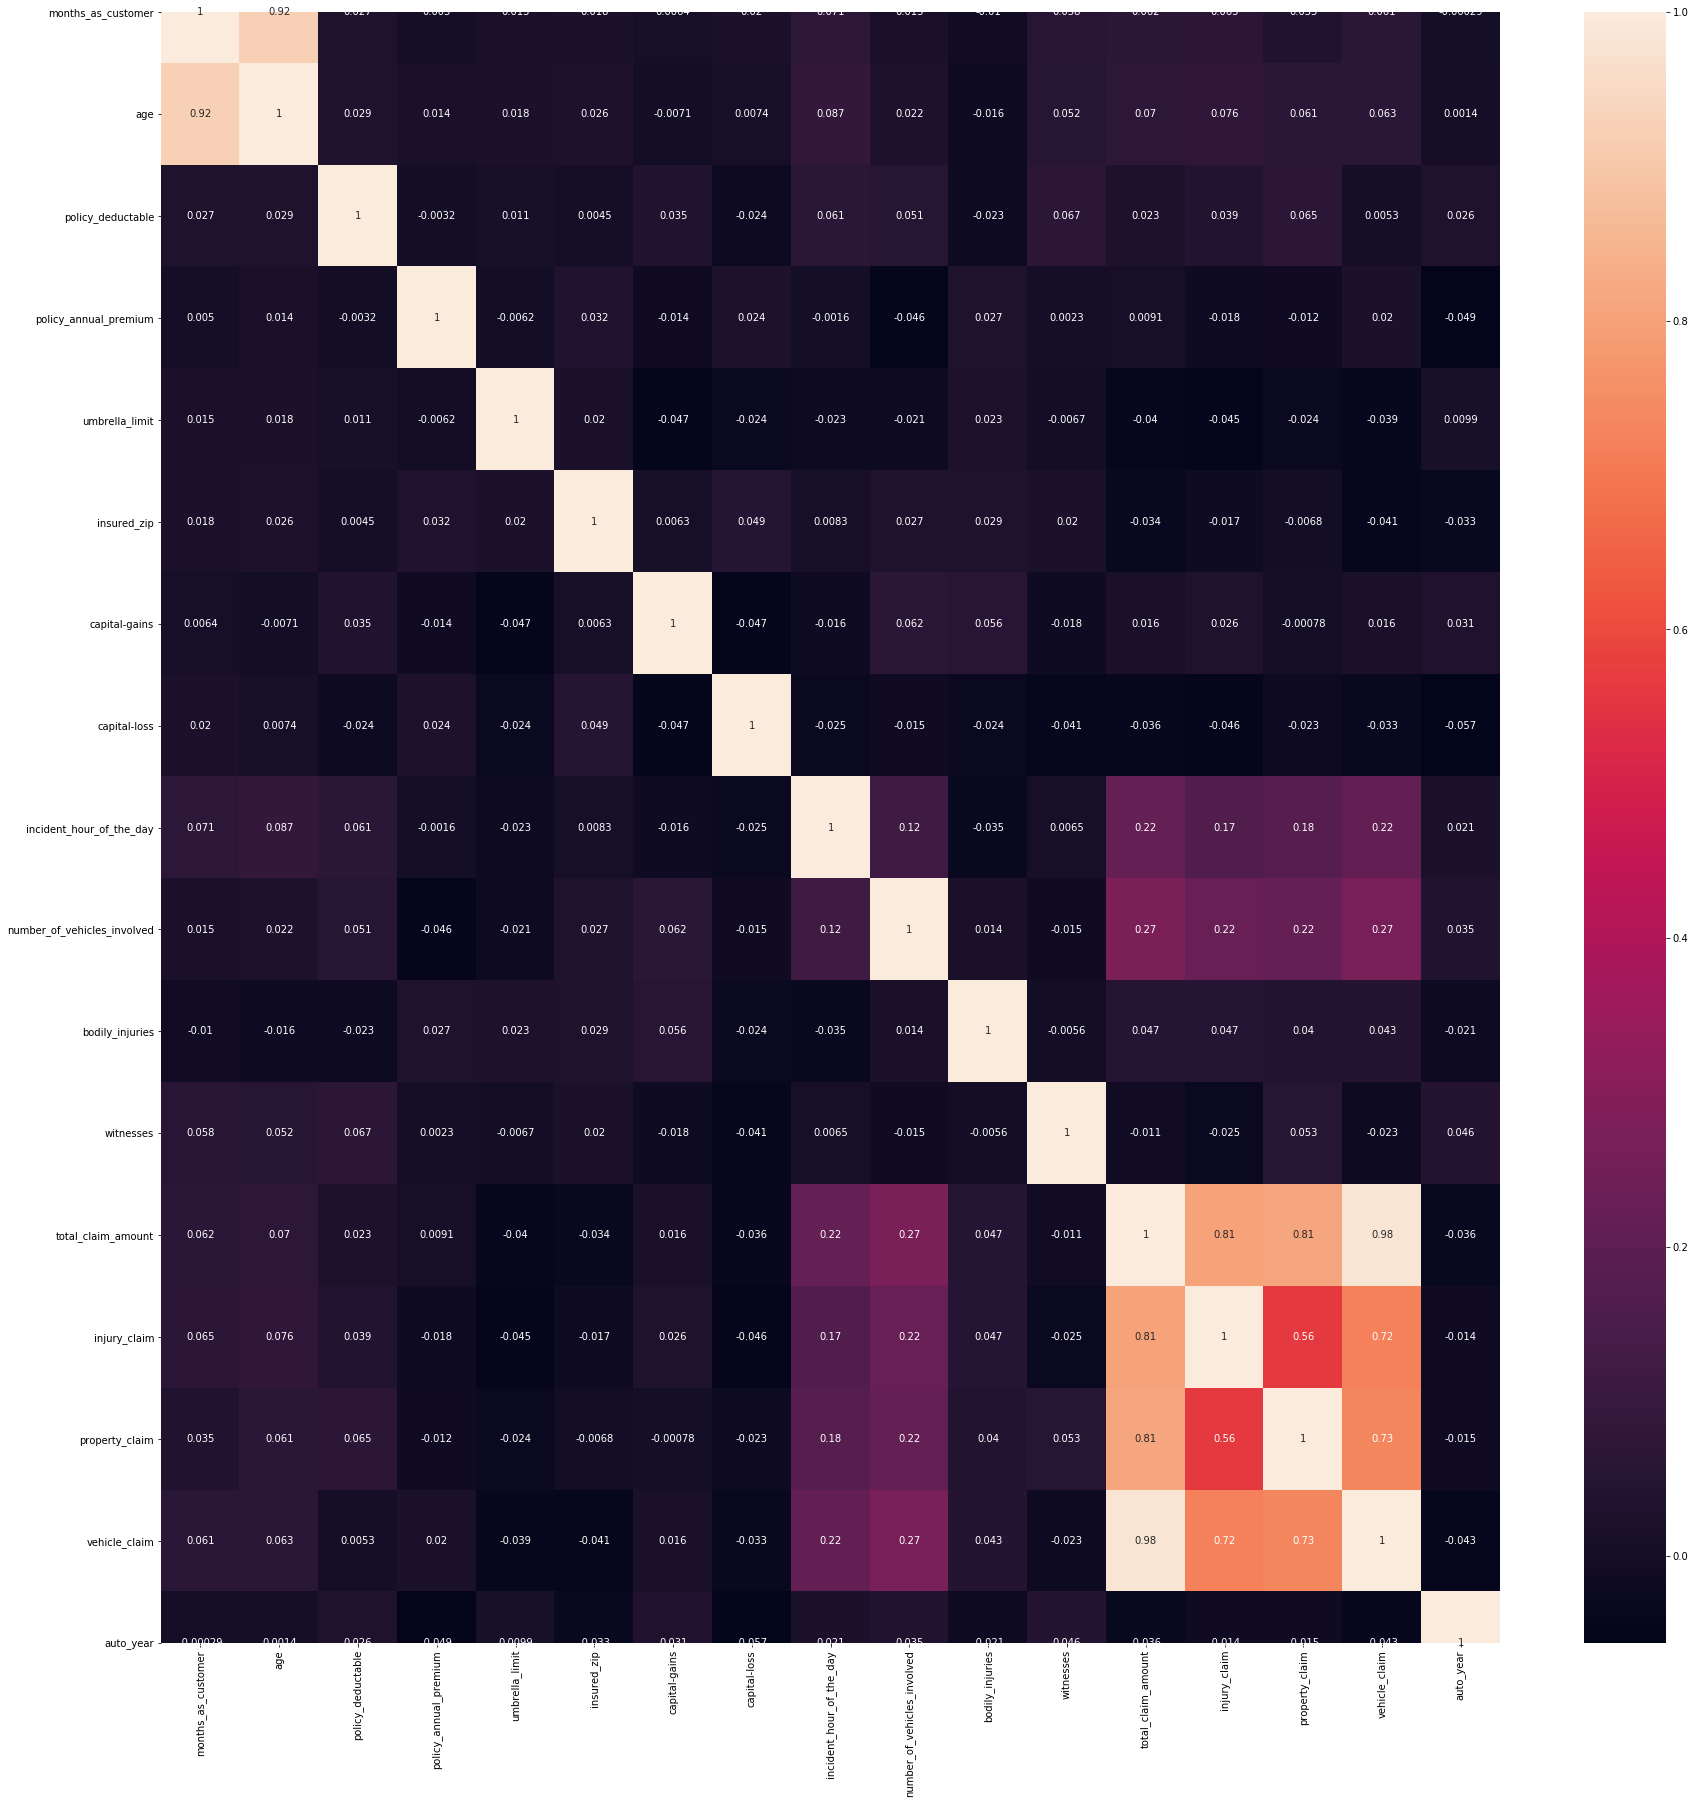

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True)

From the above we can see that total claim amount,injury claim,property claim and vehicle claim are highly correlated with each other, few of the features are slightly correlated with eachother.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CE7F30188>,
      dtype=object)

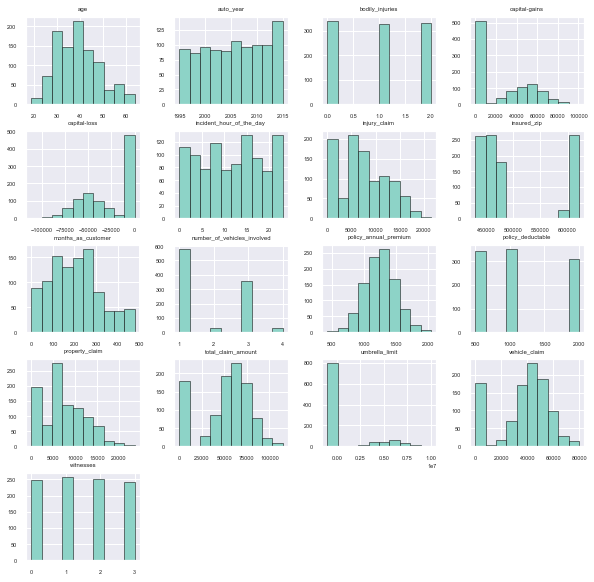

In [17]:
sns.set(style="darkgrid", palette='Set3', font_scale=0.5)
data.hist(figsize=(10,10),edgecolor='black',linewidth=0.5)

From the above sets we can see that most of the features are evenly distributed, however some of the features are postively skewed.

## Lets do the EDA

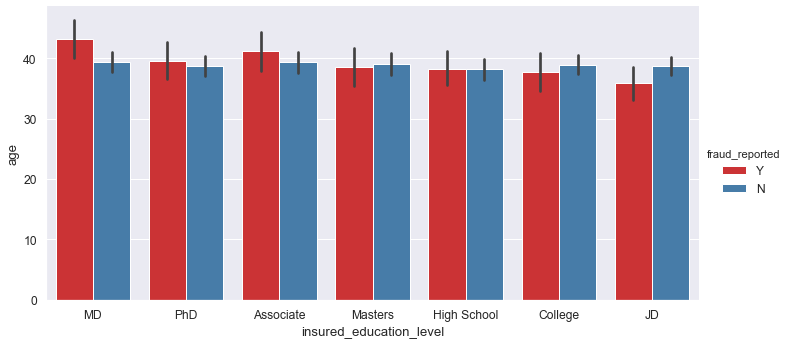

In [45]:
sns.set(font_scale=1.1)
sns.catplot(x='insured_education_level',y='age',hue='fraud_reported',data=data,kind='bar',aspect=2,palette='Set1')

From the above we can see that the people with higher education level have more fraud reported, than the people with low education level. 

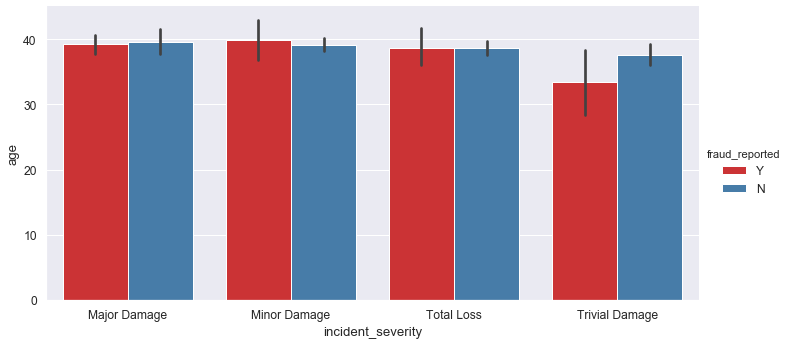

In [49]:
sns.catplot(x='incident_severity',y='age',hue='fraud_reported',data=data,kind='bar',aspect=2,palette='Set1')

From the above we can see that most number frauds was reported in minor damage.

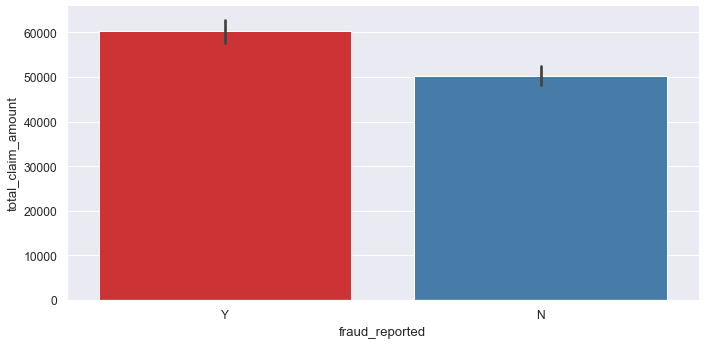

In [52]:
sns.catplot(y='total_claim_amount',x='fraud_reported',data=data,kind='bar',aspect=2,palette='Set1')

From the above we can see that upto 60,000 claim amount was reported as fraud.

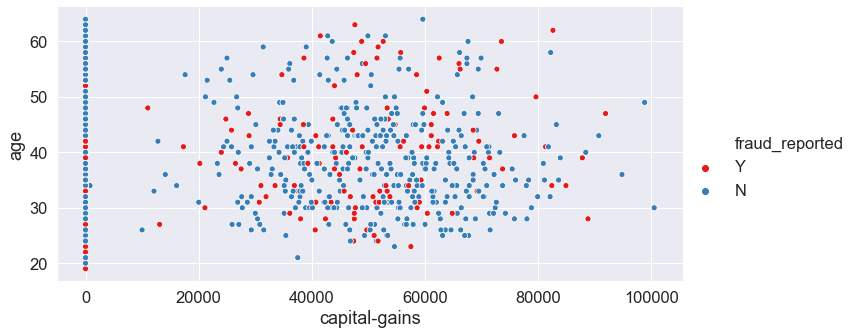

In [19]:
sns.set(font_scale=1.5)
sns.relplot(x='capital-gains',y='age',hue='fraud_reported',data=data,aspect=2,palette='Set1')

From the above we can see that from above age 20 their is an uneven capital gain and loss, and majority of the insurance fraud was reported from the people who had 40000 capital gain.

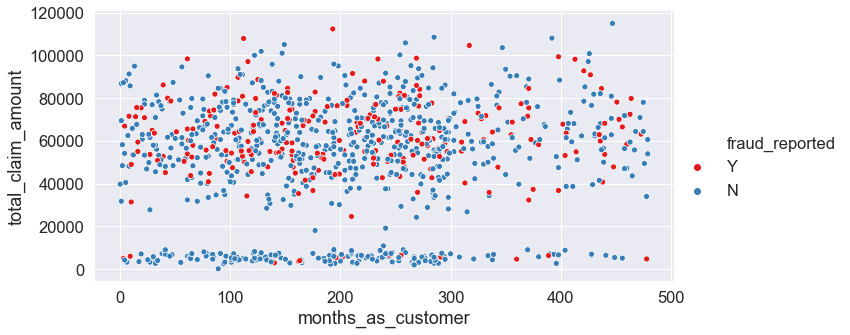

In [22]:
sns.set(font_scale=1.5)
sns.relplot(x='months_as_customer',y='total_claim_amount',hue='fraud_reported',data=data,aspect=2,palette='Set1')

From the above we can see that the majority of the claims was generated from customer who were from 100 to 350, and most of the insurance fraud was reported from new customers below 100.

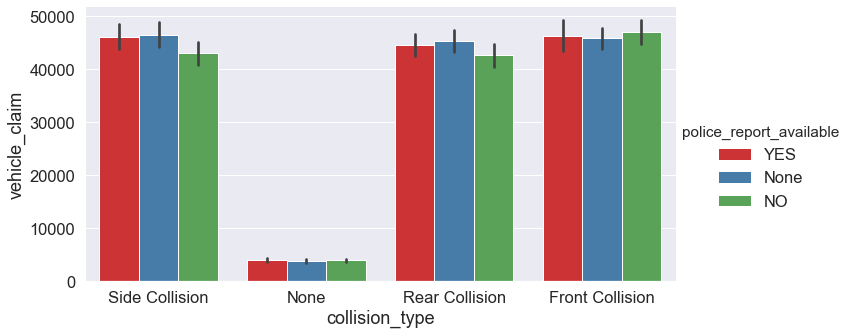

In [25]:
sns.catplot(y='vehicle_claim',x='collision_type',hue='police_report_available',data=data,kind='bar',aspect=2,palette='Set1')

From the above we can see that in most of cases police report was not available which can lead to fraud as collision should be reported, and major collisions were side and front collision.

## Feature Encoding

In [28]:
data['policy_bind_day']=data['policy_bind_date'].str.split('-').str[0].astype(int)
data['policy_bind_month']=data['policy_bind_date'].str.split('-').str[1].astype(int)
data['policy_bind_year']=data['policy_bind_date'].str.split('-').str[2].astype(int)
data['incident_day']=data['incident_date'].str.split('-').str[0].astype(int)
data['incident_month']=data['incident_date'].str.split('-').str[1].astype(int)
data['incident_year']=data['incident_date'].str.split('-').str[2].astype(int)
data.drop(['policy_bind_date'],axis=1,inplace=True)
data.drop(['incident_date'],axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['policy_state']=le.fit_transform(data['policy_state'])
data['policy_csl']=le.fit_transform(data['policy_csl'])
data['insured_sex']=le.fit_transform(data['insured_sex'])
data['insured_education_level']=le.fit_transform(data['insured_education_level'])
data['insured_occupation']=le.fit_transform(data['insured_occupation'])
data['insured_hobbies']=le.fit_transform(data['insured_hobbies'])
data['insured_relationship']=le.fit_transform(data['insured_relationship'])
data['incident_type']=le.fit_transform(data['incident_type'])
data['collision_type']=le.fit_transform(data['collision_type'])
data['incident_severity']=le.fit_transform(data['incident_severity'])
data['authorities_contacted']=le.fit_transform(data['authorities_contacted'])
data['incident_state']=le.fit_transform(data['incident_state'])
data['incident_city']=le.fit_transform(data['incident_city'])
data['property_damage']=le.fit_transform(data['property_damage'])
data['police_report_available']=le.fit_transform(data['police_report_available'])
data['auto_make']=le.fit_transform(data['auto_make'])
data['auto_model']=le.fit_transform(data['auto_model'])
data['fraud_reported']=le.fit_transform(data['fraud_reported'])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_state                   1000 non-null int32
policy_csl                     1000 non-null int32
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null int32
insured_education_level        1000 non-null int32
insured_occupation             1000 non-null int32
insured_hobbies                1000 non-null int32
insured_relationship           1000 non-null int32
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null int32
collision_type                 1000 non-null int32
incident_severity        

In [31]:
x=data.drop(['fraud_reported'],axis=1)
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,52080,10,1,2004,17,10,2014,25,1,2015
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,3510,8,12,2007,27,6,2006,21,1,2015
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,23100,4,30,2007,6,9,2000,22,2,2015
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,50720,3,34,2014,25,5,1990,10,1,2015
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,4550,0,31,2009,6,6,2014,17,2,2015


In [32]:
y=data['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [33]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=60,stratify=y)

In [42]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 40), (300, 40), (700,), (300,))

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [44]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=60)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=60)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=60)
ABC=AdaBoostClassifier(random_state=60)
ETC=ExtraTreesClassifier(random_state=60)

In [45]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.72


Cross_Val_Score =  0.70904300430043


roc_auc_score =  0.5051423104520449


classification_report
               precision    recall  f1-score   support

           0       0.76      0.93      0.83       226
           1       0.27      0.08      0.12        74

    accuracy                           0.72       300
   macro avg       0.51      0.51      0.48       300
weighted avg       0.64      0.72      0.66       300



[[210  16]
 [ 68   6]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, prob

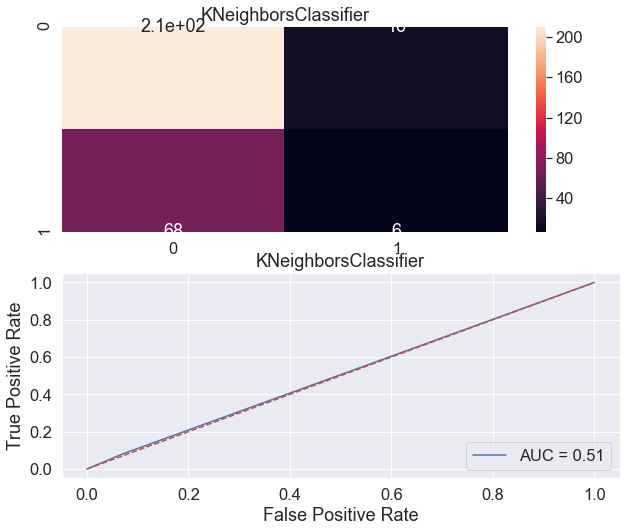

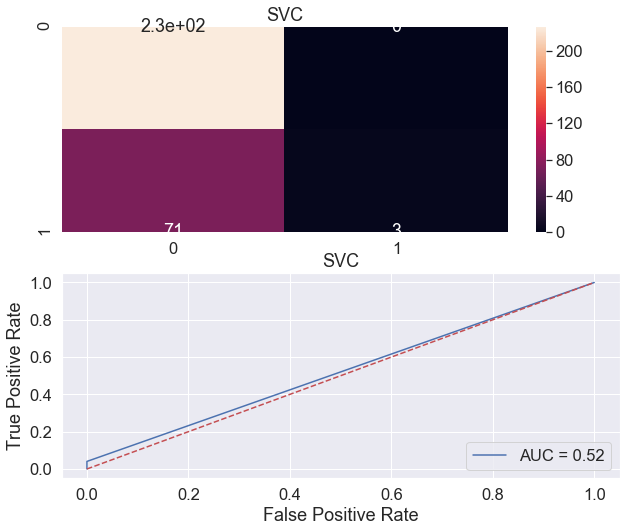

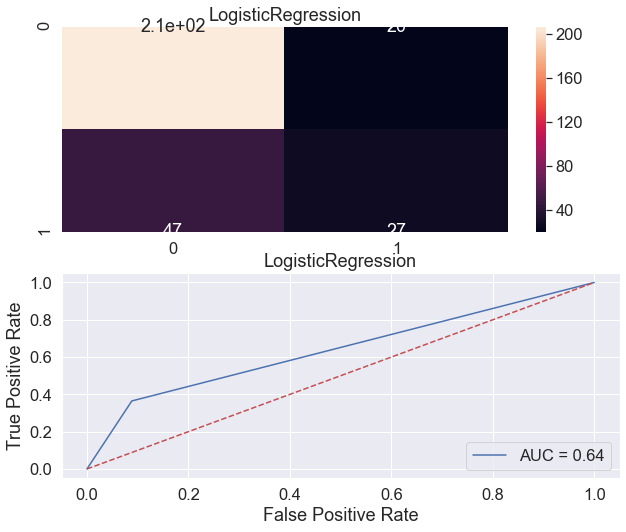

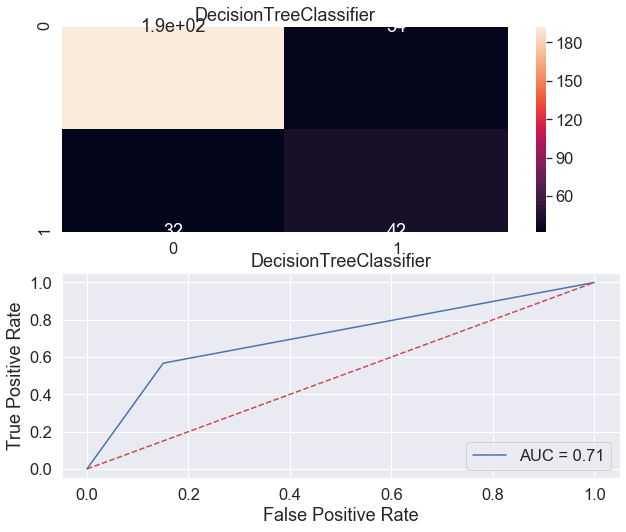

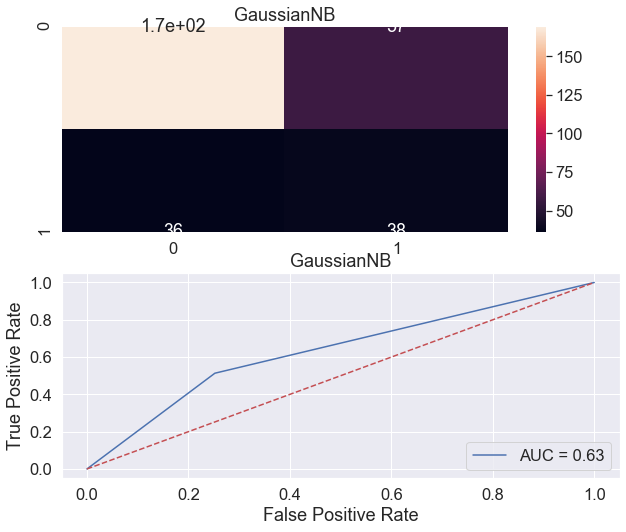

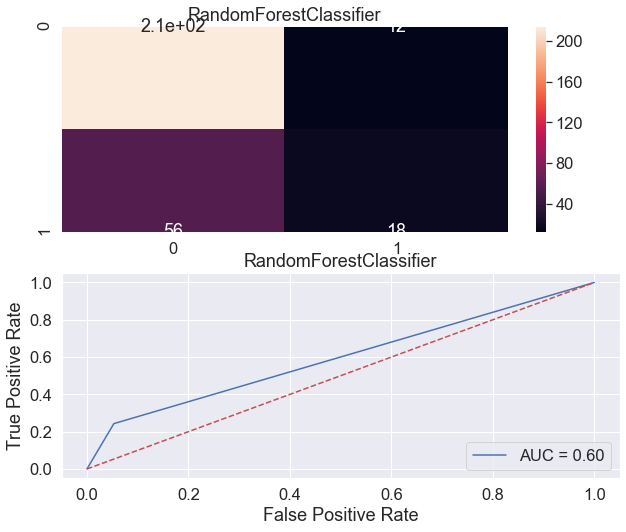

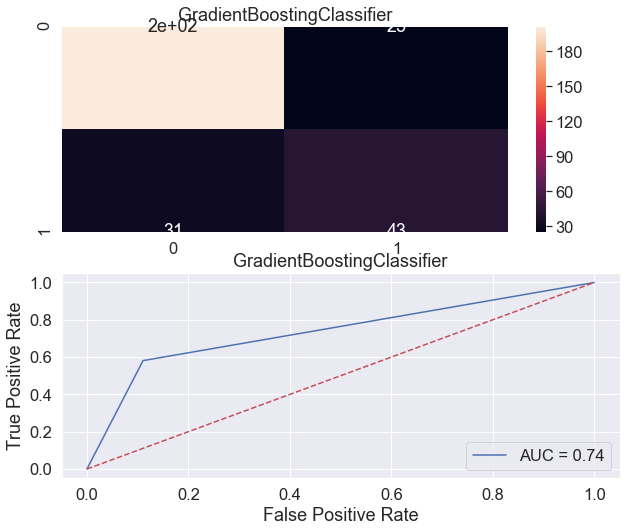

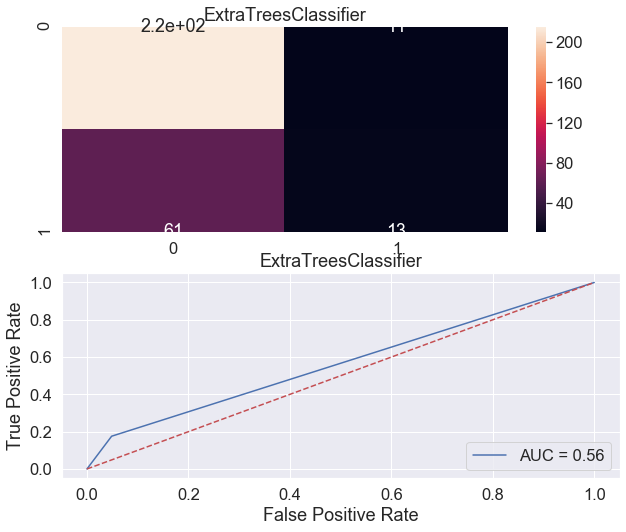

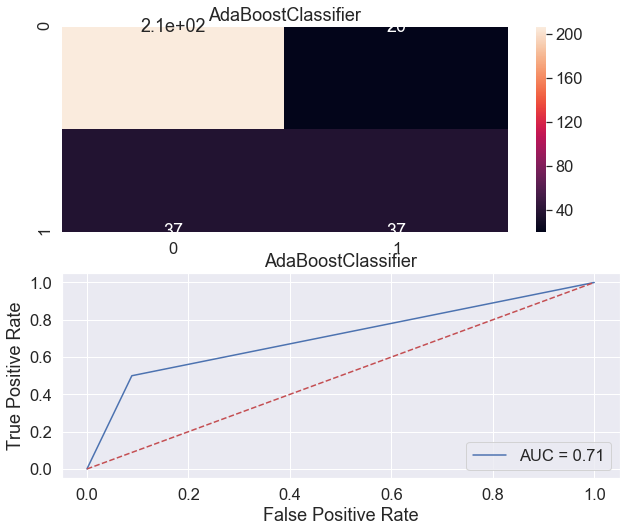

In [46]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [47]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,72.000000,70.904300,50.514231
1,SVC,76.333333,74.601530,52.027027
2,LogisticRegression,77.666667,77.508701,63.818464
3,DecisionTreeClassifier,78.000000,76.910621,70.856254
4,GaussianNB,69.000000,72.706541,63.065056
5,RandomForestClassifier,77.333333,76.815652,59.507295
6,GradientBoostingClassifier,81.333333,82.324982,73.523081
7,ExtraTreesClassifier,76.000000,76.008581,56.350155
8,AdaBoostClassifier,81.000000,79.929933,70.575221


From the above we can see that both Gradient boosting classifier and AdaBoosting classifier are performing beter than other models, however we will chose Gradient Boosting as our final model as accuracy score and crossval score both are high.

In [50]:
from sklearn.externals import joblib
joblib.dump(GBC,'Auto_Insurance_Fraud_Prediction.obj')

['Auto_Insurance_Fraud_Prediction.obj']

In [51]:
model=joblib.load('Auto_Insurance_Fraud_Prediction.obj')

In [53]:
predictions=model.predict(x_test)

In [54]:
pre = pd.DataFrame(predictions)
pre.columns = ["prediction"]
pre.to_csv("Auto_Insurance_Fraud_Prediction.csv")